<a href="https://colab.research.google.com/github/renatavb/analise-vendas-meliuz/blob/main/EstudoDados_lojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
df = pandas_gbq.read_gbq('''
  SELECT
  *
  FROM `meliuz-data-ingestion.teste_estagio_meliuz.dados`
''')

display(df.head(10))

print("\n\n Número de linhas: {}".format(len(df)))


Downloading: 100%|██████████| 33295/33295 [00:02<00:00, 14723.42rows/s]


,vendas,acessos,data,gmv,tipo,parceiro
0,1,1,2019-01-01,7.11,Padrão,parceiro539
1,1,1,2019-01-01,29.88,Padrão,parceiro236
2,1,1,2019-01-01,10.82,Padrão,parceiro100
3,1,1,2019-01-01,6.94,Padrão,parceiro507
4,1,1,2019-01-01,6.66,Padrão,parceiro427
5,1,1,2019-01-01,82.52,Padrão,parceiro102
6,1,1,2019-01-01,371.43,Padrão,parceiro238
7,1,1,2019-01-01,41.51,Padrão,parceiro103
8,1,1,2019-01-01,33.31,Padrão,parceiro606
9,1,1,2019-01-01,19.45,Padrão,parceiro428




 Número de linhas: 33295


**Quantidade de lojas na base de dados**

In [4]:

# Inicialmente, deve-se encontrar a quantiadade de lojas existentes na base, 
# ou seja verificar a coluna 'parceiro' sem repetição. Feito isso, deve-se contar
# o tamanho do dataframe refetente à consulta. Neste caso foi utilizado o método 'len'.
# Resposta: 621 lojas parceiras

qtdeLojas = len(df['parceiro'].unique())
qtdeLojas

621

**Dia em que cada loja atingiu o maior número de vendas** 

In [ ]:
# Inicialmente, realizou-se o agrupamento de parceiros por meio do método 'groupby', que neste caso permite que sejam acessados os dados de cada loja de forma organizada.
# A varíavel maxVendas contém o índice do valor máximo da coluna vendas para cada loja.
# Com intuito de facilitar a visualização do resultado requerido, foi criado um subset do data frame contendo as colunas 'parceiro','data' e 'vendas'.

maxVendas = df.loc[df.reset_index().groupby(['parceiro'],sort=False)['vendas'].idxmax()]
subSet = maxVendas[['parceiro','data','vendas']].sort_values(by=['parceiro'])
subSet


,parceiro,data,vendas
30784,parceiro1,2019-01-09,4
595,parceiro10,2019-01-06,1
2,parceiro100,2019-01-01,1
33294,parceiro101,2019-04-15,217
5,parceiro102,2019-01-01,1
...,...,...,...
12979,parceiro95,2019-04-19,1
13384,parceiro96,2019-04-23,1
13412,parceiro97,2019-04-23,1
32515,parceiro98,2019-04-08,11


**Conversão média de cada loja no mês de abril**

In [ ]:
# conversão = compras/acesso
# Inicialmente, seleciona-se apenas os dados referentes ao mês de Abril e é criada uma cópia deste data frame
# Feito isso, o cálculo de conversão diária é realizado (vendas/acessos) e em seguida é feita a média para cada parceiro.
# O processo foi colocado em uma função chamada calculaConversaoMedia para facilitar cálculos posteriores.

def calculaConversaoMedia(df,mes):
  idxMes = pd.DatetimeIndex(df['data']).month==mes
  dfMes= df[idxMes].copy()
  conversao = dfMes['vendas']/dfMes['acessos']
  dfMes['conversao'] = conversao
  dfConvMediaMes = dfMes.groupby('parceiro',sort=False).mean().reset_index()[['parceiro','conversao']]
  return dfConvMediaMes

dfConvMediaAbril = calculaConversaoMedia(df,4)
dfConvMediaAbril





,parceiro,conversao
0,parceiro562,1.000000
1,parceiro324,1.000000
2,parceiro424,1.000000
3,parceiro327,1.000000
4,parceiro118,1.000000
...,...,...
480,parceiro233,0.114320
481,parceiro290,0.106531
482,parceiro101,0.161069
483,parceiro345,0.125969


**Conversão média de cada loja no mês de maio**

In [ ]:
# utilizando a função calculaConversaoMedia feita na questão anterior, tem-se a conversão média do mês de maio.
dfConvMediaMaio = calculaConversaoMedia(df,5)
dfConvMediaMaio


,parceiro,conversao
0,parceiro267,0.833333
1,parceiro424,1.000000
2,parceiro119,1.000000
3,parceiro427,0.958333
4,parceiro606,1.000000
...,...,...
435,parceiro233,0.126010
436,parceiro290,0.100821
437,parceiro353,0.347708
438,parceiro345,0.110534


**Variação na conversão média, considerando-se os meses de maio e abril?**

In [ ]:
# Inicialmente, é feito o join entre os dataframes que contém as conversões médias dos meses de Maio e Abril. 
# As lojas que não se repetem no mês subsequente têm o valor de conversão 0 atribuído
# O cálculo da variação foi feito pela subtração da conversão de Maio com a de Abril

dfVariacao = pd.merge(dfConvMediaAbril, dfConvMediaMaio, on='parceiro', how='outer',suffixes=('_Abril', '_Maio')).fillna(0)
dfVariacao['variacao'] = dfVariacao['conversao_Maio'] - dfVariacao['conversao_Abril']
dfVariacao



,parceiro,conversao_Abril,conversao_Maio,variacao
0,parceiro562,1.0,1.00,0.00
1,parceiro324,1.0,1.00,0.00
2,parceiro424,1.0,1.00,0.00
3,parceiro327,1.0,0.00,-1.00
4,parceiro118,1.0,1.00,0.00
...,...,...,...,...
506,parceiro148,0.0,1.00,1.00
507,parceiro574,0.0,1.00,1.00
508,parceiro464,0.0,1.00,1.00
509,parceiro231,0.0,1.00,1.00


**GMV total gerado por mês**

In [ ]:
# Primeiramente, é criado um dataframe contendo os meses de referência e o valor de gmv. Feito isso, os meses são agrupados e é realizada a soma de gmv mensalmente.

dfGmv = df[['data','gmv']].copy()
dfGmv['mes'] = pd.DatetimeIndex(df['data']).month
dfGmv = dfGmv.groupby('mes',sort=False).sum().reset_index()
dfGmv


,mes,gmv
0,1,3913206.83
1,2,3476037.72
2,3,4652308.91
3,4,4294167.82
4,5,2317124.82


**GMV acumulado entre 18/02/2019 e 20/04/2019?** 

In [ ]:
# Inicialmente, é selecionado o intervalo em que se deseja observar os dados. Tal intervalo é passado como índice de um novo dataframe e em seguida é feita a soma dos valores de gmv
intervalo = (df['data'] > '2019-02-18') & (df['data'] <= '2019-04-20')
dfIntervalo = df.loc[intervalo]
dfIntervalo['gmv'].sum()


8854145.93

**Quais lojas tiveram vendas tipo promocionais**

In [ ]:
# Inicialmente, são selecionados os registros que contém 'Promocial' como tipo de venda. Após isso, é verificado quais são os parceiros de tais vendas.

indexP = df['tipo']== 'Promocional'
dfP = df.loc[indexP]
dfLojasP = dfP['parceiro'].unique()
dfLojasP

array(['parceiro235', 'parceiro233', 'parceiro290', 'parceiro345',
       'parceiro353'], dtype=object)

**Quanto cada loja vendeu no período promocional**

In [ ]:
# Utilizando a variável dfP da questão 08 que contém os registros do período promocial foi feito o agrupamento por parceiro e em seguida a soma do número de vendas.
dfP.groupby('parceiro',sort=False).sum().reset_index()[['parceiro','vendas']]


,parceiro,vendas
0,parceiro235,63
1,parceiro233,225
2,parceiro290,310
3,parceiro345,461
4,parceiro353,1047


**Período ocorreram as vendas promocionais**

In [ ]:
# Utilizando novamente a variável dfP da questão 8, foi selecionado a data mínima e máxima do período promocional.
periodoP = (dfP['data'].min(),dfP['data'].max())
print("\n\n Período promocional: {} até {}".format(periodoP[0],periodoP[1]))




 Período promocional: 2019-03-20 00:00:00 até 2019-03-31 00:00:00


**Outras informações extraídas da base**

Text(0, 0.5, 'Conversao Media')

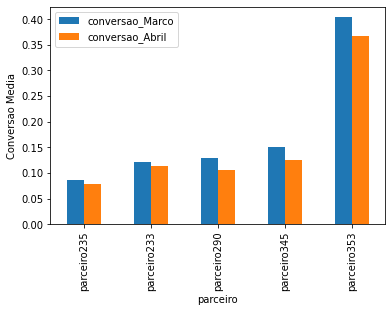

In [ ]:
# Uma informação interessante a ser extraída dos dados é a comparação entre um mês com período promocional e outro sem. Esta comparação auxilia a percepção de como o consumidor
# se comporta com promoções e se as taxas de conversão podem estar ligadas a preços mais baixos de produtos. No histograma gerado abaixo, foram selecionadas as lojas que participaram 
# do período promocional para a comparação entre as conversões médias dos meses de março (com período promocional) e o mês de abril. As taxas de conversão são mais altas no mês de março,
# indicando sensibilidade do consumidor à redução de preços. Porém, pode-observar que para alguns parceiros como o 235 e o 233, a diferença entre a conversão média de marco e abril é sutil,
# podendo ser um indicativo de que o consumidor não considerou a promoção vantajosa suficiente para a realização da compra, por exemplo, o potencial consumidor foi atraído para o site, mas não 
# efetivou a compra. 


import matplotlib.pyplot as plt
dfAvaliacao = df[df['parceiro'].isin(dfLojasP.ravel())]

conversaoMediaMarco = calculaConversaoMedia(dfAvaliacao,3)
conversaoMediaAbril = calculaConversaoMedia(dfAvaliacao,4)
df2 = pd.merge(conversaoMediaMarco, conversaoMediaAbril,on='parceiro', how='outer',suffixes=('_Marco', '_Abril')).fillna(0)
df2.set_index('parceiro').plot(kind="bar")
plt.ylabel("Conversao Media")

